In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir("/kaggle/input")

['icr-identify-age-related-conditions']

In [3]:
df = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
df_original = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
df_greeks = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/greeks.csv")
df_test = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")

In [4]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
df_test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [7]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [9]:
df['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [10]:
def full_pipeline(df, numeric_columns=None, categorical_columns=None, date_column=None,
                          columns_to_upper=None, columns_to_lower=None):

            if date_column is not None:
                df[date_column] = pd.to_datetime(df[date_column])

            if numeric_columns is not None:
                for column in numeric_columns:
                    df[column].fillna(df[column].mean(), inplace=True)
                    
            if categorical_columns is not None:
                df = pd.get_dummies(df, columns=categorical_columns)

            if columns_to_upper is not None:
                for column in columns_to_upper:
                    df[column] = df[column].str.upper()

            if columns_to_lower is not None:
                for column in columns_to_lower:
                    df[column] = df[column].str.lower()

            #df_scaled = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())

            return df

In [11]:
df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [12]:
numeric_columns = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']
categorical_columns = ['EJ']

df = full_pipeline(df, numeric_columns, categorical_columns, date_column=None,
                          columns_to_upper=None, columns_to_lower=None)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [14]:
df_numeric = df[['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/1911544441.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

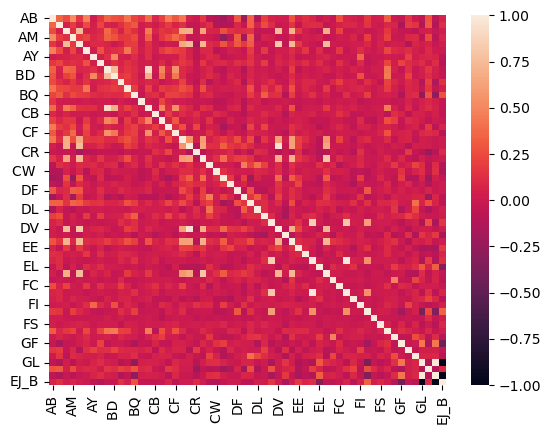

In [15]:
import seaborn as sns

sns.heatmap(df.corr())

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

remaining_columns = list(df.columns.drop(numeric_columns))


numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Create the column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_columns)
], remainder='passthrough')  # Include remaining columns as-is)

transformed_data = preprocessor.fit_transform(df)

numeric_column_names = preprocessor.transformers_[0][2]

# Create a new DataFrame with the transformed columns and the remaining columns from the original DataFrame
new_columns = list(numeric_column_names) + remaining_columns
df_transformed = pd.DataFrame(transformed_data, columns=new_columns)

In [17]:
df_transformed

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GB,GE,GF,GH,GI,GL,Id,Class,EJ_A,EJ_B
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-0.940094,-0.41026,-0.655511,-0.948991,0.531241,-0.815752,000ff2bfdfe9,1,0,1
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,-1.14507,-0.41026,0.687893,-0.238862,-0.509218,1.304239,007255e47698,0,1,0
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,-0.104787,-0.071089,...,1.637944,-0.29921,-0.05185,-0.351743,-0.424754,-0.808323,013f2bd269f5,0,0,1
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.72961,-0.083417,0.112088,-0.104787,-0.391109,...,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.812311,043ac50845d5,0,0,1
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,1.445139,0.125327,...,-0.432313,0.09992,-0.318309,1.409422,-0.395228,-0.818054,044fb8a146ec,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,-0.699975,-0.161828,0.040232,-0.422762,0.275215,-0.802577,0.040875,-0.464891,-0.08061,-0.395082,...,-1.17768,0.593022,-0.340465,-0.694915,0.513497,1.304239,fd3dafe738fd,0,1,0
613,-0.088253,0.852755,-0.261669,0.108831,0.556117,0.170319,-0.082686,0.473063,-0.065661,0.100596,...,1.519617,2.535523,-0.599582,-0.186764,2.048314,-0.813328,fd895603f071,0,0,1
614,-0.106514,-0.453742,0.09014,0.235206,-0.011673,0.99033,-0.083417,1.113828,-0.104787,0.178374,...,-0.0764,-0.019561,-0.424307,-0.540129,1.903449,1.304239,fd8ef6377f76,0,1,0
615,-0.243466,-0.973904,-0.261669,-0.219353,-0.189295,0.955584,-0.083417,-0.699741,-0.104787,-0.275772,...,0.387591,-0.41026,-0.6575,-0.646592,-0.370599,-0.809518,fe1942975e40,0,0,1


In [18]:
X = df_transformed.loc[:, ~df_transformed.columns.isin(['Id','Class'])]

In [19]:
y = df_transformed['Class'].astype('int')

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

In [21]:
X_train

array([[3.6368575500933935, 0.9210215128743585, -0.2616689572988051, ...,
        -0.827287340702866, 0, 1],
       [-0.1612948069593688, 0.1573045685633169, 0.13247991631619635,
        ..., -0.819316084395691, 0, 1],
       [-0.051732719736692974, -0.4882966265719808, -0.20473861488944237,
        ..., -0.8208230785840696, 0, 1],
       ...,
       [-0.3712888074694975, -0.7876614342777908, -0.18067105696069372,
        ..., -0.5393619073829401, 0, 1],
       [0.45955702063579423, -0.34496124581042764, 0.04780029323544362,
        ..., -0.8152242147279231, 0, 1],
       [0.012178497809867853, 0.7832016433248566, -0.2616689572988051,
        ..., -0.8206370633686814, 0, 1]], dtype=object)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_clf = rnd_clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_clf)

0.9112903225806451

In [24]:
scores = []
for name, score in zip(X, rnd_clf.feature_importances_):
    scores.append([name, score])

In [25]:
import operator
s = sorted(scores, key = operator.itemgetter(1), reverse=True)

In [26]:
s

[['DU', 0.11150308813574453],
 ['DA', 0.07345628226364287],
 ['DI', 0.05220283350778377],
 ['GL', 0.04854642802217304],
 ['CR', 0.04354595910713773],
 ['FL', 0.04218046103620381],
 ['FR', 0.04109628172405767],
 ['EH', 0.04064368365597688],
 ['AB', 0.034556229907556024],
 ['BQ', 0.03272160314066799],
 ['FD ', 0.02818616183510062],
 ['AF', 0.027846390020760628],
 ['BC', 0.024216920597065705],
 ['DE', 0.020592865482454047],
 ['EE', 0.018799355945261307],
 ['FE', 0.018099396021375943],
 ['CC', 0.01583577095874777],
 ['FI', 0.014967152469212437],
 ['BP', 0.013932871320538847],
 ['AM', 0.013420547876239159],
 ['CD ', 0.012529132197918123],
 ['AX', 0.012527053923369749],
 ['DL', 0.01245650987682025],
 ['BR', 0.012149747129231883],
 ['CF', 0.012088727127592755],
 ['EB', 0.011521318414417678],
 ['CU', 0.011328383318676822],
 ['DH', 0.011213154962860974],
 ['GH', 0.01109747344347802],
 ['DY', 0.011092753522321202],
 ['DN', 0.010314430676617744],
 ['GF', 0.010259500055809112],
 ['CB', 0.009585308

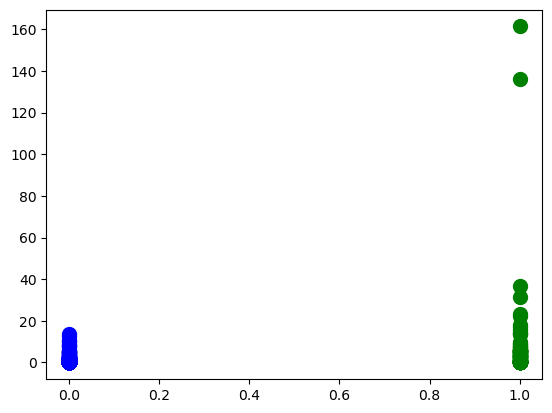

In [27]:
for i in range(len(df)):
    color = 'blue' if df.Class[i] == 0 else 'green'
    plt.scatter(df.Class[i], df.DU[i], color=color, marker='o', s=100)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_clf = ada_clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_clf)

0.9193548387096774